<a href="https://colab.research.google.com/github/kotguru/ML_bmstu/blob/main/lab12_Gurov_Konstantin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Read file + info

In [ ]:
data = pd.read_csv('data.csv', names=['Surname', 'Name', 'Patronymic', 'Sex']) 

In [ ]:
data.head()

,Surname,Name,Patronymic,Sex
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,М
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,М
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,М
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,М
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,М


In [ ]:
data.tail()

,Surname,Name,Patronymic,Sex
6228603,ИЩЕНКО,МАЙЯ,АННАДУРДЫЕВНА,Ж
6228604,КОСТЮШИНА,НАТАЛИЯ,ВЯЧЕСЛАВОВНА,Ж
6228605,КАСАТКИНА,ТАТЬЯНА,ВЛАДИМИРОВНА,Ж
6228606,МАКСАКОВА,ГАЛИНА,ГЕОРГИЕВНА,Ж
6228607,БЫКОВСКАЯ,ЕКАТЕРИНА,ВЛАДИМИРОВНА,Ж


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228608 entries, 0 to 6228607
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Surname     object
 1   Name        object
 2   Patronymic  object
 3   Sex         object
dtypes: object(4)
memory usage: 190.1+ MB


## Одномерный анализ

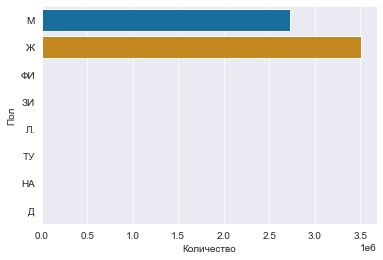

In [ ]:
sns.set_style('darkgrid')
sns.countplot(y='Sex',data=data,palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.show()

### Наиболее часто встречающиеся имена

In [ ]:
data['Name'].value_counts().index

Index(['АЛЕКСАНДР', 'ТАТЬЯНА', 'СЕРГЕЙ', 'ЕЛЕНА', 'ВЛАДИМИР', 'НАТАЛЬЯ',
       'ОЛЬГА', 'АЛЕКСЕЙ', 'ВАЛЕНТИНА', 'АННА',
       ...
       'БАРЛЫБАЙ', 'АИШАТ', 'САРБОЗШО', 'КУЖАН', 'ШАРИБАН', 'ЮДМИНА',
       'ОЛИМТОН', 'ИНННА', 'ВЛАДИГОР', 'Н.Л'],
      dtype='object', length=45199)

#### Избавляемся от ненужных строк, значения в которых некорректные

In [ ]:
data.loc[(data['Sex'] != 'М') & (data['Sex'] != 'Ж')]

,Surname,Name,Patronymic,Sex
1650995,УПРАВЛЕНИЕ ПО ДЕЛАМ,МОЛОДЕЖИ,КУЛЬТУРЫ,ФИ
1654029,АООТЭЛЕКТРОСВЯЗЬ,О,/З-Й УЗЕЛ ЭЛЕКТРОСВЯ,ЗИ
1654030,ЗАО ПРЕДПРИЯТИЕ ИТИ,ПО ПОСТ.ИНФ.,ТЕХНО,Л.
1654031,ЗАО ПРЕДПРИЯТИЕ ИТИ,ПО ПОСТ.ИНФ.,ТЕХНО,Л.
1656255,КОМИТЕТ ПО ФИЗИЧЕСКО,Й КУЛЬТУРЕ,СПОРТУ,ТУ
1665280,1900304,МАЛАХОВКА,УЛ.КАЛИНИ,НА
1665290,1900163,ЛЮБЕРЦЫ,УЛ.ЮЖНАЯ,Д
1752987,УПРАВЛЕНИЕ ПО ДЕЛАМ,МОЛОДЕЖИ,КУЛЬТУРЫ,ФИ


In [ ]:
data.drop(data.loc[(data['Sex'] != 'М') & (data['Sex'] != 'Ж')].index, inplace=True)
data.dropna(inplace=True)
data.reset_index()

,index,Surname,Name,Patronymic,Sex
0,0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,М
1,1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,М
2,2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,М
3,3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,М
4,4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,М
...,...,...,...,...,...
6225701,6228603,ИЩЕНКО,МАЙЯ,АННАДУРДЫЕВНА,Ж
6225702,6228604,КОСТЮШИНА,НАТАЛИЯ,ВЯЧЕСЛАВОВНА,Ж
6225703,6228605,КАСАТКИНА,ТАТЬЯНА,ВЛАДИМИРОВНА,Ж
6225704,6228606,МАКСАКОВА,ГАЛИНА,ГЕОРГИЕВНА,Ж


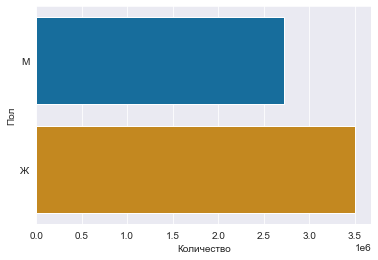

In [ ]:
sns.set_style('darkgrid')
sns.countplot(y='Sex',data=data,palette='colorblind')
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.show()

#### Количественная оценка разделения данных по полу

In [ ]:
female_count = len(data[data['Sex']=='Ж'])
male_count = len(data) - female_count
print("\n Всего женщин:", female_count, "; ", round(female_count/len(data) * 100), "%",
      "\n","Всего мужчин:", male_count, "; ", round(male_count/len(data) * 100), "%")


 Всего женщин: 3503762 ;  56 % 
 Всего мужчин: 2721944 ;  44 %


In [ ]:
names = set(data['Name'])
surnames = set(data['Surname'])
patronymic = set(data['Patronymic'])

In [ ]:
len(names)

45177

In [ ]:
len(surnames)

383420

In [ ]:
len(patronymic)

80995

## Feature engineering

In [ ]:
data["Name"] = data["Name"].astype('string')
data["Surname"] = data["Surname"].astype('string')
data["Patronymic"] = data["Patronymic"].astype('string')
data["Sex"] = data["Sex"].astype('category')

In [ ]:
data['patr_is_vna'] = [i[2][-1::] == 'А' for i in data.values]
data['name_is_a_ya'] = [((i[1][-1::] == 'А') or (i[1][-1::] == 'Я')) for i in data.values]
data['surname_is_a_ya'] = [((i[0][-1::] == 'А') or (i[0][-1::] == 'Я')) for i in data.values]
data["patr_is_vna"] = data["patr_is_vna"].astype(int)
data["name_is_a_ya"] = data["name_is_a_ya"].astype(int)
data["surname_is_a_ya"] = data["surname_is_a_ya"].astype(int)
data.dtypes

Surname              string
Name                 string
Patronymic           string
Sex                category
patr_is_vna           int32
name_is_a_ya          int32
surname_is_a_ya       int32
dtype: object

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Predict with linear regression

In [ ]:
x = data.copy()
x.drop(['Name', 'Surname', 'Patronymic', 'Sex'], axis=1, inplace=True)

In [ ]:
y = list(map(int, [((i[3] == 'М') or (i[0][-1::] == 'Ж')) for i in data.values]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
model = linear_model.LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(np.round(abs(y_pred)),  y_test) 
print(f'Accuracy: {accuracy}')

precision = precision_score(np.round(abs(y_pred)), y_test)
print(f'Precision: {precision}')

recall = recall_score(np.round(abs(y_pred)), y_test)
print(f'Recall: {recall}')

Accuracy: 0.9957264187632606
Precision: 0.9980722639607912
Recall: 0.9922071976432496


## Predict with logistic regression

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_pred, y_test)
print(f'Precision: {precision}')

recall = recall_score(y_pred, y_test)
print(f'Recall: {recall}')

Accuracy: 0.9969213665919845
Precision: 0.9973603475931665
Recall: 0.9956116243097358


## Predict with Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=4)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_pred, y_test)
print(f'Precision: {precision}')

recall = recall_score(y_pred, y_test)
print(f'Recall: {recall}')

Accuracy: 0.9969213665919845
Precision: 0.9973603475931665
Recall: 0.9956116243097358


## Predict with Random Forerst

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 10)

In [ ]:
# ?RandomForestClassifier

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_pred, y_test)
print(f'Precision: {precision}')

recall = recall_score(y_pred, y_test)
print(f'Recall: {recall}')

Accuracy: 0.9969213665919845
Precision: 0.9973603475931665
Recall: 0.9956116243097358


## Predict with XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(np.round(abs(y_pred)),  y_test) 
print(f'Accuracy: {accuracy}')

precision = precision_score(np.round(abs(y_pred)), y_test)
print(f'Precision: {precision}')

recall = recall_score(np.round(abs(y_pred)), y_test)
print(f'Recall: {recall}')

Accuracy: 0.9969213665919845
Precision: 0.9973603475931665
Recall: 0.9956116243097358


## Predict with LightGBM

In [ ]:
import lightgbm as ltb

In [ ]:
model = ltb.LGBMClassifier()

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_pred, y_test)
print(f'Precision: {precision}')

recall = recall_score(y_pred, y_test)
print(f'Recall: {recall}')

Accuracy: 0.9969213665919845
Precision: 0.9973603475931665
Recall: 0.9956116243097358


# Выводы

Все представленные способы классификации показали отличные результаты, это связано с четким разделением мужских и женских имен и отчеств, на котором был основан отбор признаков для обучения.